In [1]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Lendo o arquivo com pandas e atribuindo os dados a variável
df = pd.read_csv(r"projeto-01-habitos-estudo/data/student_habits_performance.csv")

# Visualizando tabela com dados
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


In [3]:
# Tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [4]:
# Colunas númericas
cols = ["study_hours_per_day",
        "social_media_hours",
        "netflix_hours",
        "sleep_hours",
        "attendance_percentage",
        "exercise_frequency",
        "mental_health_rating",
        "exam_score"
        ]

Quais hábitos impactam mais o desempenho dos alunos?

<function matplotlib.pyplot.show(close=None, block=None)>

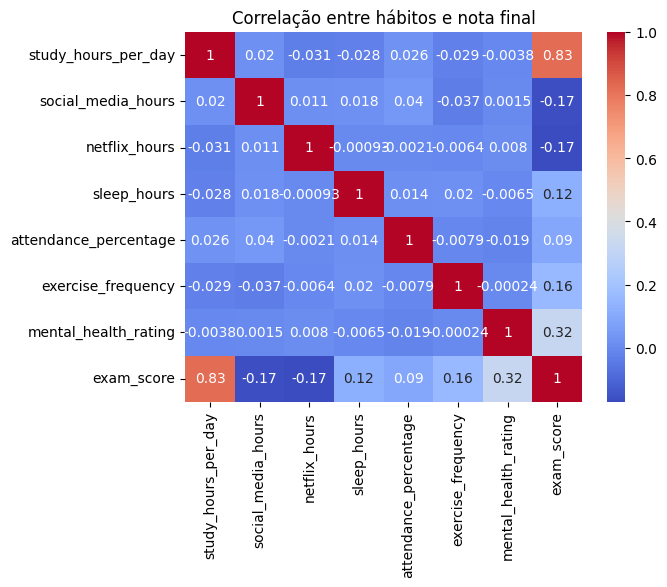

In [5]:
# Plotar mapa de calor(heatmap)
sns.heatmap(df[cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlação entre hábitos e nota final")
plt.show

Alunos que mais estudam têm melhor desempenho?

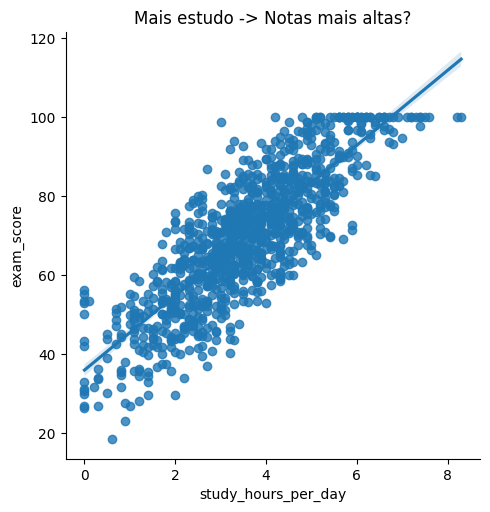

In [6]:
# Gráfico de dispersão com linha de regressão
# x="study_hours_per_day"/ y="exam_score"

sns.lmplot(data=df, x="study_hours_per_day", y="exam_score")

plt.title("Mais estudo -> Notas mais altas?")
plt.show()

In [7]:
# Comparanado médias: quem estuda > 5h vs < 2h
filtro_estudo_alto = df["study_hours_per_day"] > 5
filtro_estudo_baixo = df["study_hours_per_day"] < 2

# Aplicando filtro no dataframe e segmetando a coluna de notas
grupo_estudo_alto = df[filtro_estudo_alto]["exam_score"]
grupo_estudo_baixo = df[filtro_estudo_baixo]["exam_score"]

print("Média notas (estudo > 5h): ", grupo_estudo_alto.mean())
print("Média notas (estudo < 2h): ", grupo_estudo_baixo.mean())

Média notas (estudo > 5h):  90.79419354838709
Média notas (estudo < 2h):  45.56390977443609


Tempo gasto em redes sociais afeta o desempenho dos alunos?

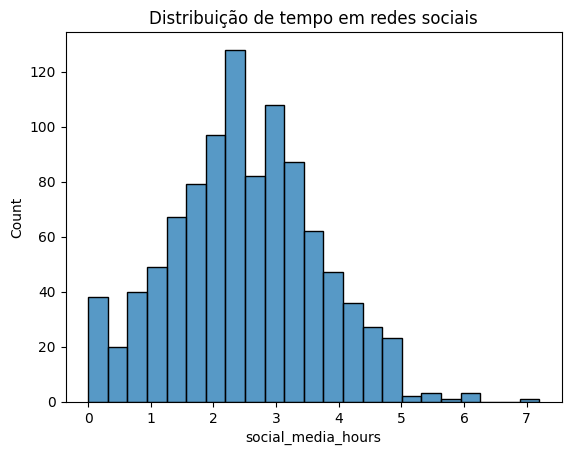

In [8]:
# Redes sociais: Distribuição geral (Histograma)
# x="social_media_hours"

sns.histplot(data= df, x="social_media_hours")
plt.title("Distribuição de tempo em redes sociais")
plt.show()

/var/folders/gj/xq3l6h9d6dx44zqvjxthjdsr0000gn/T/ipykernel_58116/2168412069.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="social_media_bin", y="exam_score", data=df, palette=['green','orange', 'red'] )


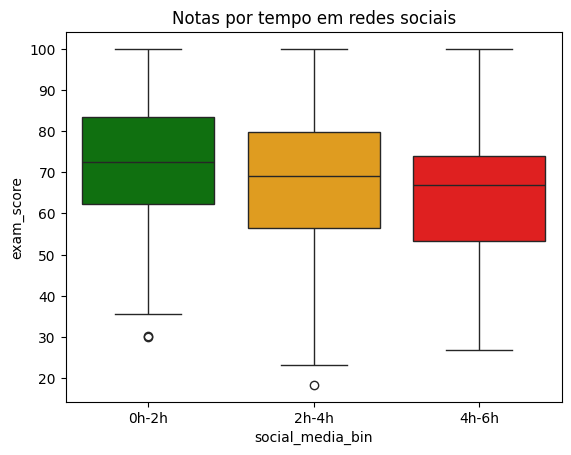

In [9]:
# Avaliando notas média por diferentes intervalos(bins)
# gastos em redes sociais

df["social_media_bin"] = pd.cut(
    df["social_media_hours"],
    bins=[0, 2, 4, 6],
    labels= ["0h-2h", "2h-4h", "4h-6h"],
)

# Plotar gráfico de caixa (boxplot)
sns.boxplot(x="social_media_bin", y="exam_score", data=df, palette=['green','orange', 'red'] )
plt.title("Notas por tempo em redes sociais")
plt.show()

Alunos mais saudáveis têm melhores desempenhos?

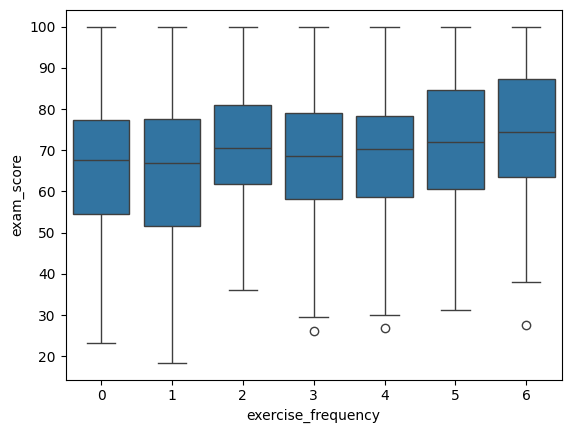

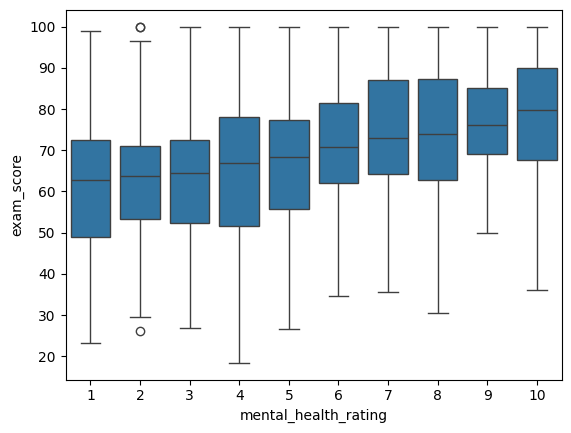

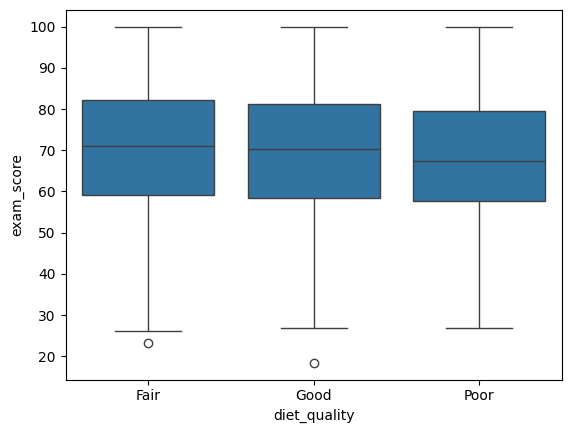

In [10]:
# Frequência de exercícios físicos, dieta e saúde mental

for col in ["exercise_frequency", "mental_health_rating", "diet_quality"]:
    sns.boxplot(x=col, y="exam_score", data=df)
    plt.show()

Há diferença nas notas entre mulheres e homens?

In [11]:
# Estatística por gênero(média e desvio padräo)

df.groupby("gender")["exam_score"].agg(["mean", "std"]).reset_index()

,gender,mean,std
0,Female,69.741372,16.899351
1,Male,69.368344,17.150875
2,Other,70.647619,13.755890


In [12]:
# Avaliar distribuição de gênero

df["gender"].value_counts(normalize=True).rename("gender").rename_axis(None)

Female    0.481
Male      0.477
Other     0.042
Name: gender, dtype: float64